In [1]:
# ! pip install lazypredict

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import lazypredict
from lazypredict.Supervised import LazyRegressor

/tmp/ipykernel_4803/1015671757.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset = pd.read_csv('mTOR_dataset.csv', lineterminator='\n')

In [3]:
# Extract features and target
# Split the train and test set

non_numeric_metadata_columns = ["molecule_chembl_id", "class", "canonical_smiles"]

dataset = dataset.drop(non_numeric_metadata_columns, axis=1)

X = dataset.drop('pIC50', axis=1)
Y = dataset.pIC50

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
np.random.seed(100)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)

In [6]:
r2

0.7662954252287983

In [7]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

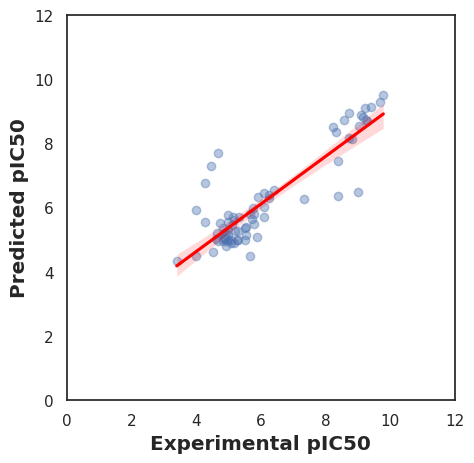

In [9]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4}, line_kws={"color": "red"})

ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [ ]:
# Testing Other Models

In [11]:
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models_test, predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████████████████████████████████████▉ | 41/42 [01:28<00:01,  1.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 51845
[LightGBM] [Info] Number of data points in the train set: 297, number of used features: 654
[LightGBM] [Info] Start training from score 6.186481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|███████████████████████████████████████████| 42/42 [01:29<00:00,  2.13s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [18]:
predictions_test = predictions_test.sort_values('RMSE')

In [19]:
predictions_test.head()

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,1.01,0.90,0.55,1.53
GammaRegressor,1.02,0.85,0.68,1.45
LassoLarsCV,1.02,0.85,0.68,2.37
LGBMRegressor,1.02,0.85,0.68,0.43
HistGradientBoostingRegressor,1.02,0.83,0.70,1.59


[(0.0, 10.0)]

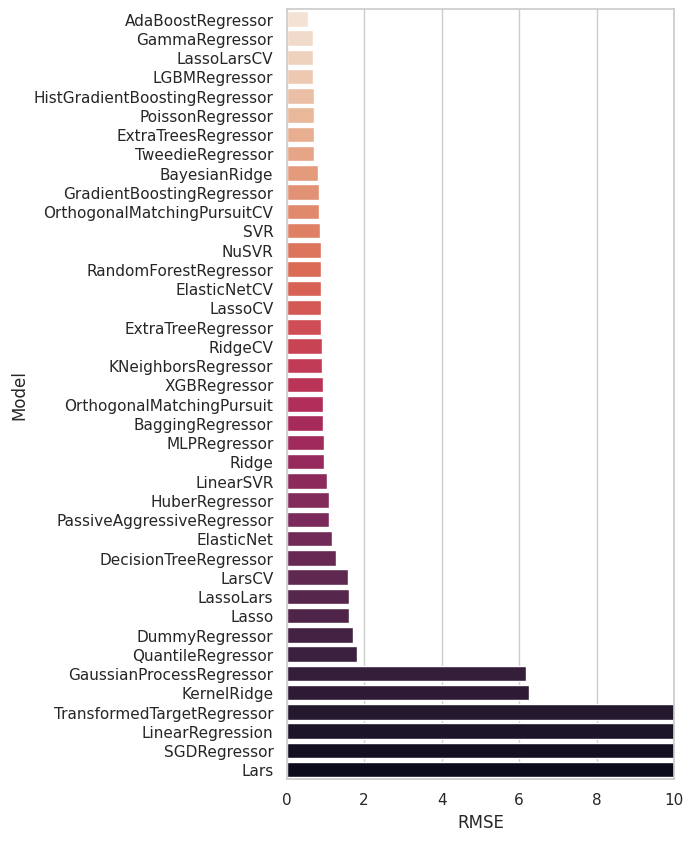

In [64]:
plt.figure(figsize=(5, 10))
my_palette = sns.color_palette("rocket_r", n_colors=len(predictions_test))

ax = sns.barplot(y=predictions_test.index, x="RMSE", data=predictions_test, palette=my_palette)
# sns.light_palette(

ax.set(xlim=(0, 10))

In [75]:
#################
# Test Molecule #
#################

In [76]:
descriptor_names = X.keys().tolist()

In [77]:
from rdkit import Chem
from mordred import Calculator, descriptors

tryptophan = 'C1=CC=C2C(=C1)C(=CN2)CC(C(=O)O)N'

mol = Chem.MolFromSmiles(tryptophan)

calc = Calculator(descriptors, ignore_3D=True)

descriptors = calc.pandas([mol])

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  5.07it/s]


In [78]:
descriptors = descriptors[descriptor_names]

KeyError: "['MW.1', 'LogP', 'NumHDonors', 'NumHAcceptors'] not in index"

In [ ]:
dataset = pd.read_csv('dataset.csv', lineterminator='\n')

X = dataset.drop('pIC50', axis=1)
Y = dataset.pIC50

for descriptors in X.keys().tolist():
    X = X.apply (pd.to_numeric, errors='coerce')
    
X = X.fillna(X.mean())


In [ ]:
descriptors = descriptors.apply(pd.to_numeric, errors='coerce').dropna(axis=1)
descriptors = descriptors.fillna(X.mean())

In [ ]:
model.predict(descriptors)